# 1 Load required packages

In [345]:
from stable_baselines3 import TD3
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.ddpg.policies import MlpPolicy
from stable_baselines3.common.noise import OrnsteinUhlenbeckActionNoise
import gym
from gym import spaces
import pandas as pd
import numpy as np
from PortfolioChoice import PortfolioChoice

# create and check environment
env = PortfolioChoice()
check_env(env)

# 2. Estimate model

In [304]:
n_actions = env.action_space.shape[-1]
param_noise = None
action_noise = OrnsteinUhlenbeckActionNoise(mean=np.zeros(n_actions), sigma=float(0.5)*np.ones(n_actions))
policy_kwargs = dict(net_arch=dict(pi=[64, 64], qf=[256, 128, 64, 32]))
td3_model = TD3(MlpPolicy, env, verbose=1, action_noise=action_noise, policy_kwargs=policy_kwargs, buffer_size=30000, gamma=1, learning_starts=128, train_freq=(1,"episode"), batch_size=128, policy_delay=100)
td3_model.learn(total_timesteps=300000)
td3_model.save("PortfolioChoice_solution")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 9.25     |
|    ep_rew_mean     | 64.4     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 4511     |
|    time_elapsed    | 0        |
|    total_timesteps | 37       |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 9.62     |
|    ep_rew_mean     | 67       |
| time/              |          |
|    episodes        | 8        |
|    fps             | 4203     |
|    time_elapsed    | 0        |
|    total_timesteps | 77       |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 9.17     |
|    ep_rew_mean     | 65.4     |
| time/              |          |
|    episodes        | 12       |
|    fps             |

c:\Users\paulw\Anaconda3\envs\openai\lib\site-packages\gym\spaces\box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 9.25     |
|    ep_rew_mean     | 71.4     |
| time/              |          |
|    episodes        | 20       |
|    fps             | 442      |
|    time_elapsed    | 0        |
|    total_timesteps | 185      |
| train/             |          |
|    critic_loss     | 25.2     |
|    learning_rate   | 0.001    |
|    n_updates       | 50       |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 9.38     |
|    ep_rew_mean     | 73.4     |
| time/              |          |
|    episodes        | 24       |
|    fps             | 313      |
|    time_elapsed    | 0        |
|    total_timesteps | 225      |
| train/             |          |
|    critic_loss     | 8.79     |
|    learning_rate   | 0.001    |
|    n_updates       | 90       |
---------------------------------
---------------------------------
| rollout/    

<AxesSubplot:>

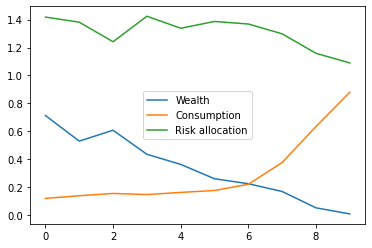

In [352]:
solution_model = TD3.load("PortfolioChoice_solution")

obs = env.reset()
results = []
for n in range(10):
    action, _states = solution_model.predict(obs)
    obs, rewards, dones, info = env.step(action,0.1)
    risk_alloc = (action[0])*2+1
    consumption = (action[1]+1)/2
    wealth = obs[0]
    time = obs[1]*10
    results.append([wealth, consumption, risk_alloc])

results = pd.DataFrame(results)
results.columns = ['Wealth', 'Consumption', 'Risk allocation']

pd.DataFrame(results).plot()
